In [6]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from skimage.segmentation import slic, quickshift, find_boundaries, felzenszwalb
from skimage import feature
from scipy import ndimage
from skimage import exposure
from skimage.filters import rank, sobel_h, sobel_v, sobel, roberts
from skimage.filters.rank import enhance_contrast, median, mean, mean_bilateral
from skimage import color
from skimage.morphology import disk
from scipy.ndimage import morphology
from scipy.ndimage import measurements
from skimage.exposure import equalize_hist
from skimage import feature
from skimage.measure import regionprops
import matplotlib.patches as mpatches
%matplotlib inline

In [7]:
# The input image
solar = r".\train_images\image101.tif"

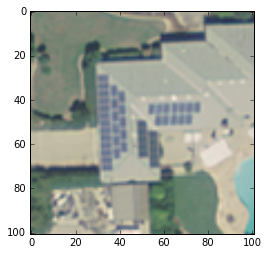

In [8]:
# Convert image to numpy array
img = io.imread(solar)
plt.imshow(img)

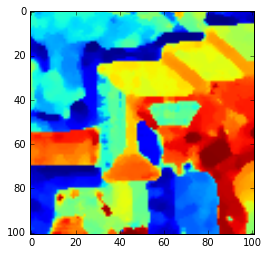

In [16]:
from skimage.exposure import equalize_hist
imgGray = color.rgb2gray(img)
equalized_image = equalize_hist(imgGray)
plt.imshow(equalized_image)

equalized_image = median(equalized_image, disk(1))
equalized_image = enhance_contrast(equalized_image, disk(1))
equalized_image = median(equalized_image, disk(3))

plt.imshow(equalized_image)

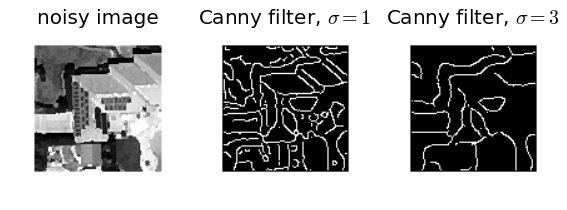

[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.00098039  0.02352941 ..., -0.0245098  -0.02745098  0.        ]
 [ 0.          0.00588235  0.02843137 ..., -0.02941176 -0.03529412  0.        ]
 ..., 
 [ 0.         -0.00392157 -0.00196078 ...,  0.00098039  0.00196078  0.        ]
 [ 0.         -0.0372549  -0.02058824 ...,  0.00098039  0.00196078  0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]


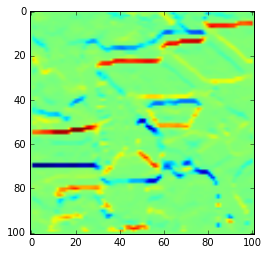

[[False False False ..., False False False]
 [False False  True ..., False False False]
 [False False  True ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]


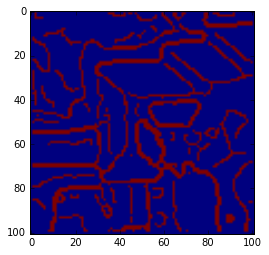

In [17]:
from skimage import feature

edges1 = feature.canny(equalized_image)
edges2 = feature.canny(equalized_image, sigma=3)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(enh, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.tight_layout()

plt.show()

edges3 = sobel_h(equalized_image)
edges4 = sobel_v(equalized_image)
plt.imshow(edges3)
print(edges3)
plt.show()
plt.imshow(edges4)
plt.imshow(edges3 + edges4 + edges1)
edges5 = sobel(equalized_image)
edges5 = edges5 > 0.2
plt.imshow(edges1 + edges5)
edges6 = edges1 + edges5
print(edges6)

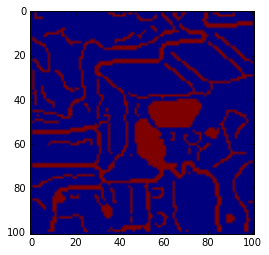

In [18]:
fillHoles = morphology.binary_fill_holes(edges6)
plt.imshow(fillHoles)

[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]


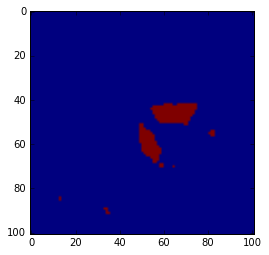

In [19]:
maskedFillHoles = fillHoles*(edges6 == 0)
print(maskedFillHoles)
plt.imshow(maskedFillHoles)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


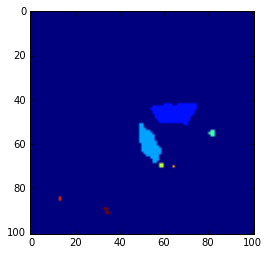

In [20]:
labeledRegions, _ = measurements.label(maskedFillHoles)
print(labeledRegions)
plt.imshow(labeledRegions)

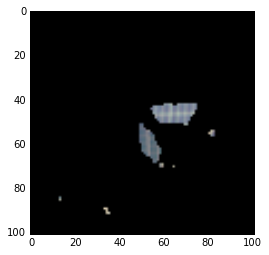

In [21]:
img[:, :, 0] = img[:,:,0]*maskedFillHoles
img[:, :, 1] = img[:,:,1]*maskedFillHoles
img[:, :, 2] = img[:,:,2]*maskedFillHoles

plt.imshow(img)

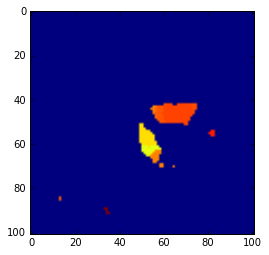

In [22]:
t2 = color.rgb2gray(img)
otsuT = enhance_contrast(t2, disk(7))
plt.imshow(otsuT)

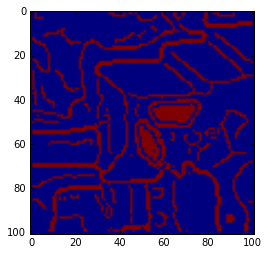

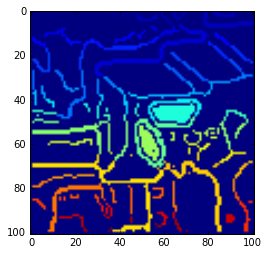

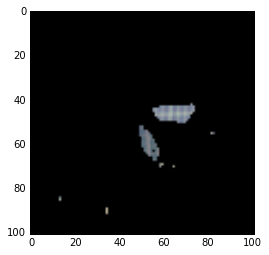

In [23]:
edges7 = sobel(otsuT) > 0.1
edges8 = feature.canny(otsuT, sigma = 1)
maskedFillHoles1 = fillHoles*(edges8 == 0)
plt.imshow(maskedFillHoles1)
plt.show()

labeledRegions1, _ = measurements.label(maskedFillHoles1)
plt.imshow(labeledRegions1)
plt.show()

img[:, :, 0] = img[:,:,0]*maskedFillHoles1
img[:, :, 1] = img[:,:,1]*maskedFillHoles1
img[:, :, 2] = img[:,:,2]*maskedFillHoles1

plt.imshow(img)

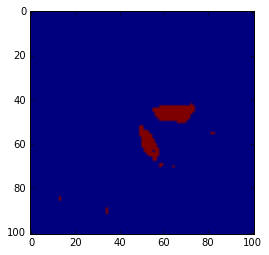

In [24]:
binaryImg = color.rgb2gray(img) > 0
plt.imshow(binaryImg)

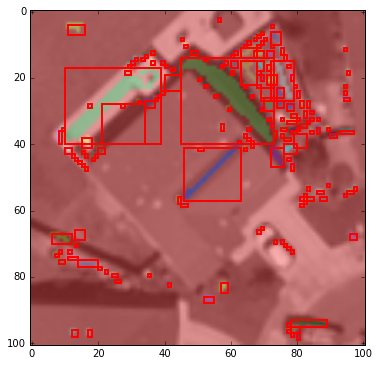

In [505]:
from skimage.measure import regionprops
import matplotlib.patches as mpatches

labeledRegions2, _ = measurements.label(binaryImg)

image_label_overlay = color.label2rgb(labeledRegions2, image=img)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(image_label_overlay)

for region in regionprops(labeledRegions2):



    # draw rectangle around segmented coins
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

plt.show()

In [191]:
# Run the quick shift segmentation algorithm
segments = quickshift(otsuT, kernel_size = 10, convert2lab = False, max_dist = 2, ratio = 10)

In [192]:
print("Quickshift number of segments: %d" % len(np.unique(segments)))

Quickshift number of segments: 377


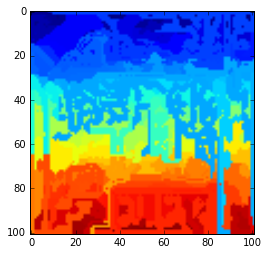

In [193]:
%matplotlib inline
# View the segments via Python
plt.imshow(segments)

In [194]:
slicSegments = slic(otsuT, n_segments = 10, sigma = 1)
print("Slic number of segments: %d" % len(np.unique(slicSegments)))

Slic number of segments: 9


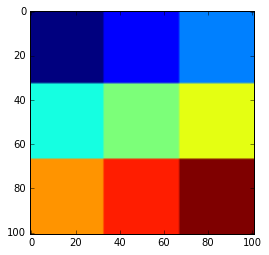

In [195]:
# View the segments via Python
plt.imshow(slicSegments)

In [273]:
felzSegments = felzenszwalb(img, scale = 100, min_size = 6)
print("Graph Segmentation number of segments: %d" % len(np.unique(felzSegments)))

Graph Segmentation number of segments: 165


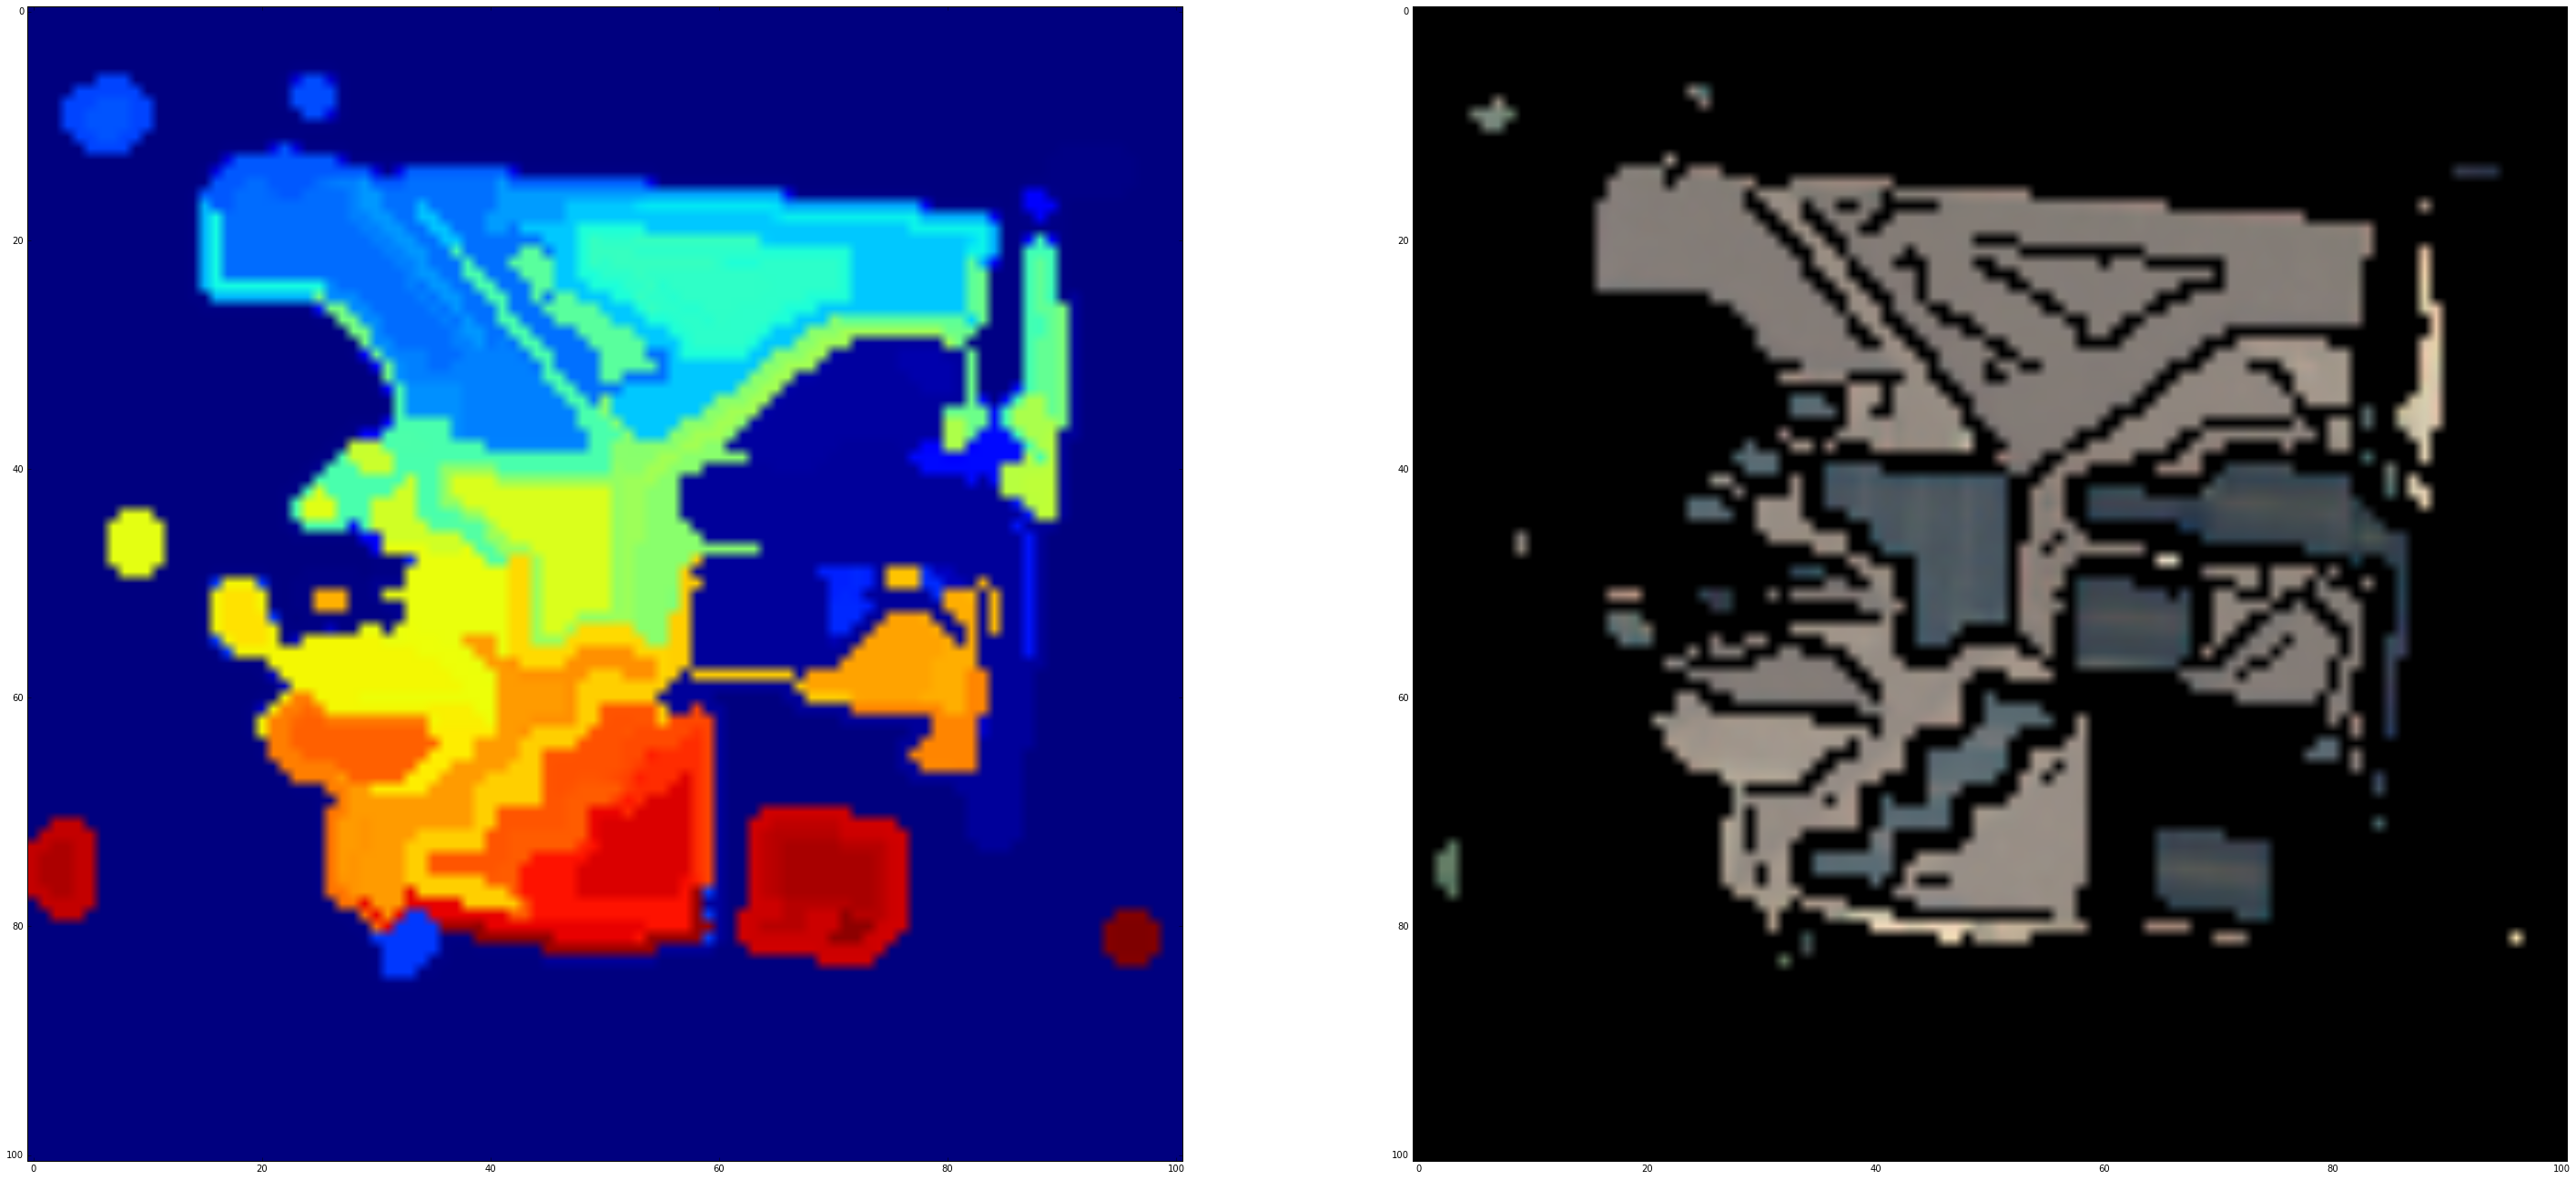

In [274]:
plt.figure(figsize=(50,50))
plt.subplot(121)
plt.imshow(felzSegments)
plt.subplot(122)
plt.imshow(img)

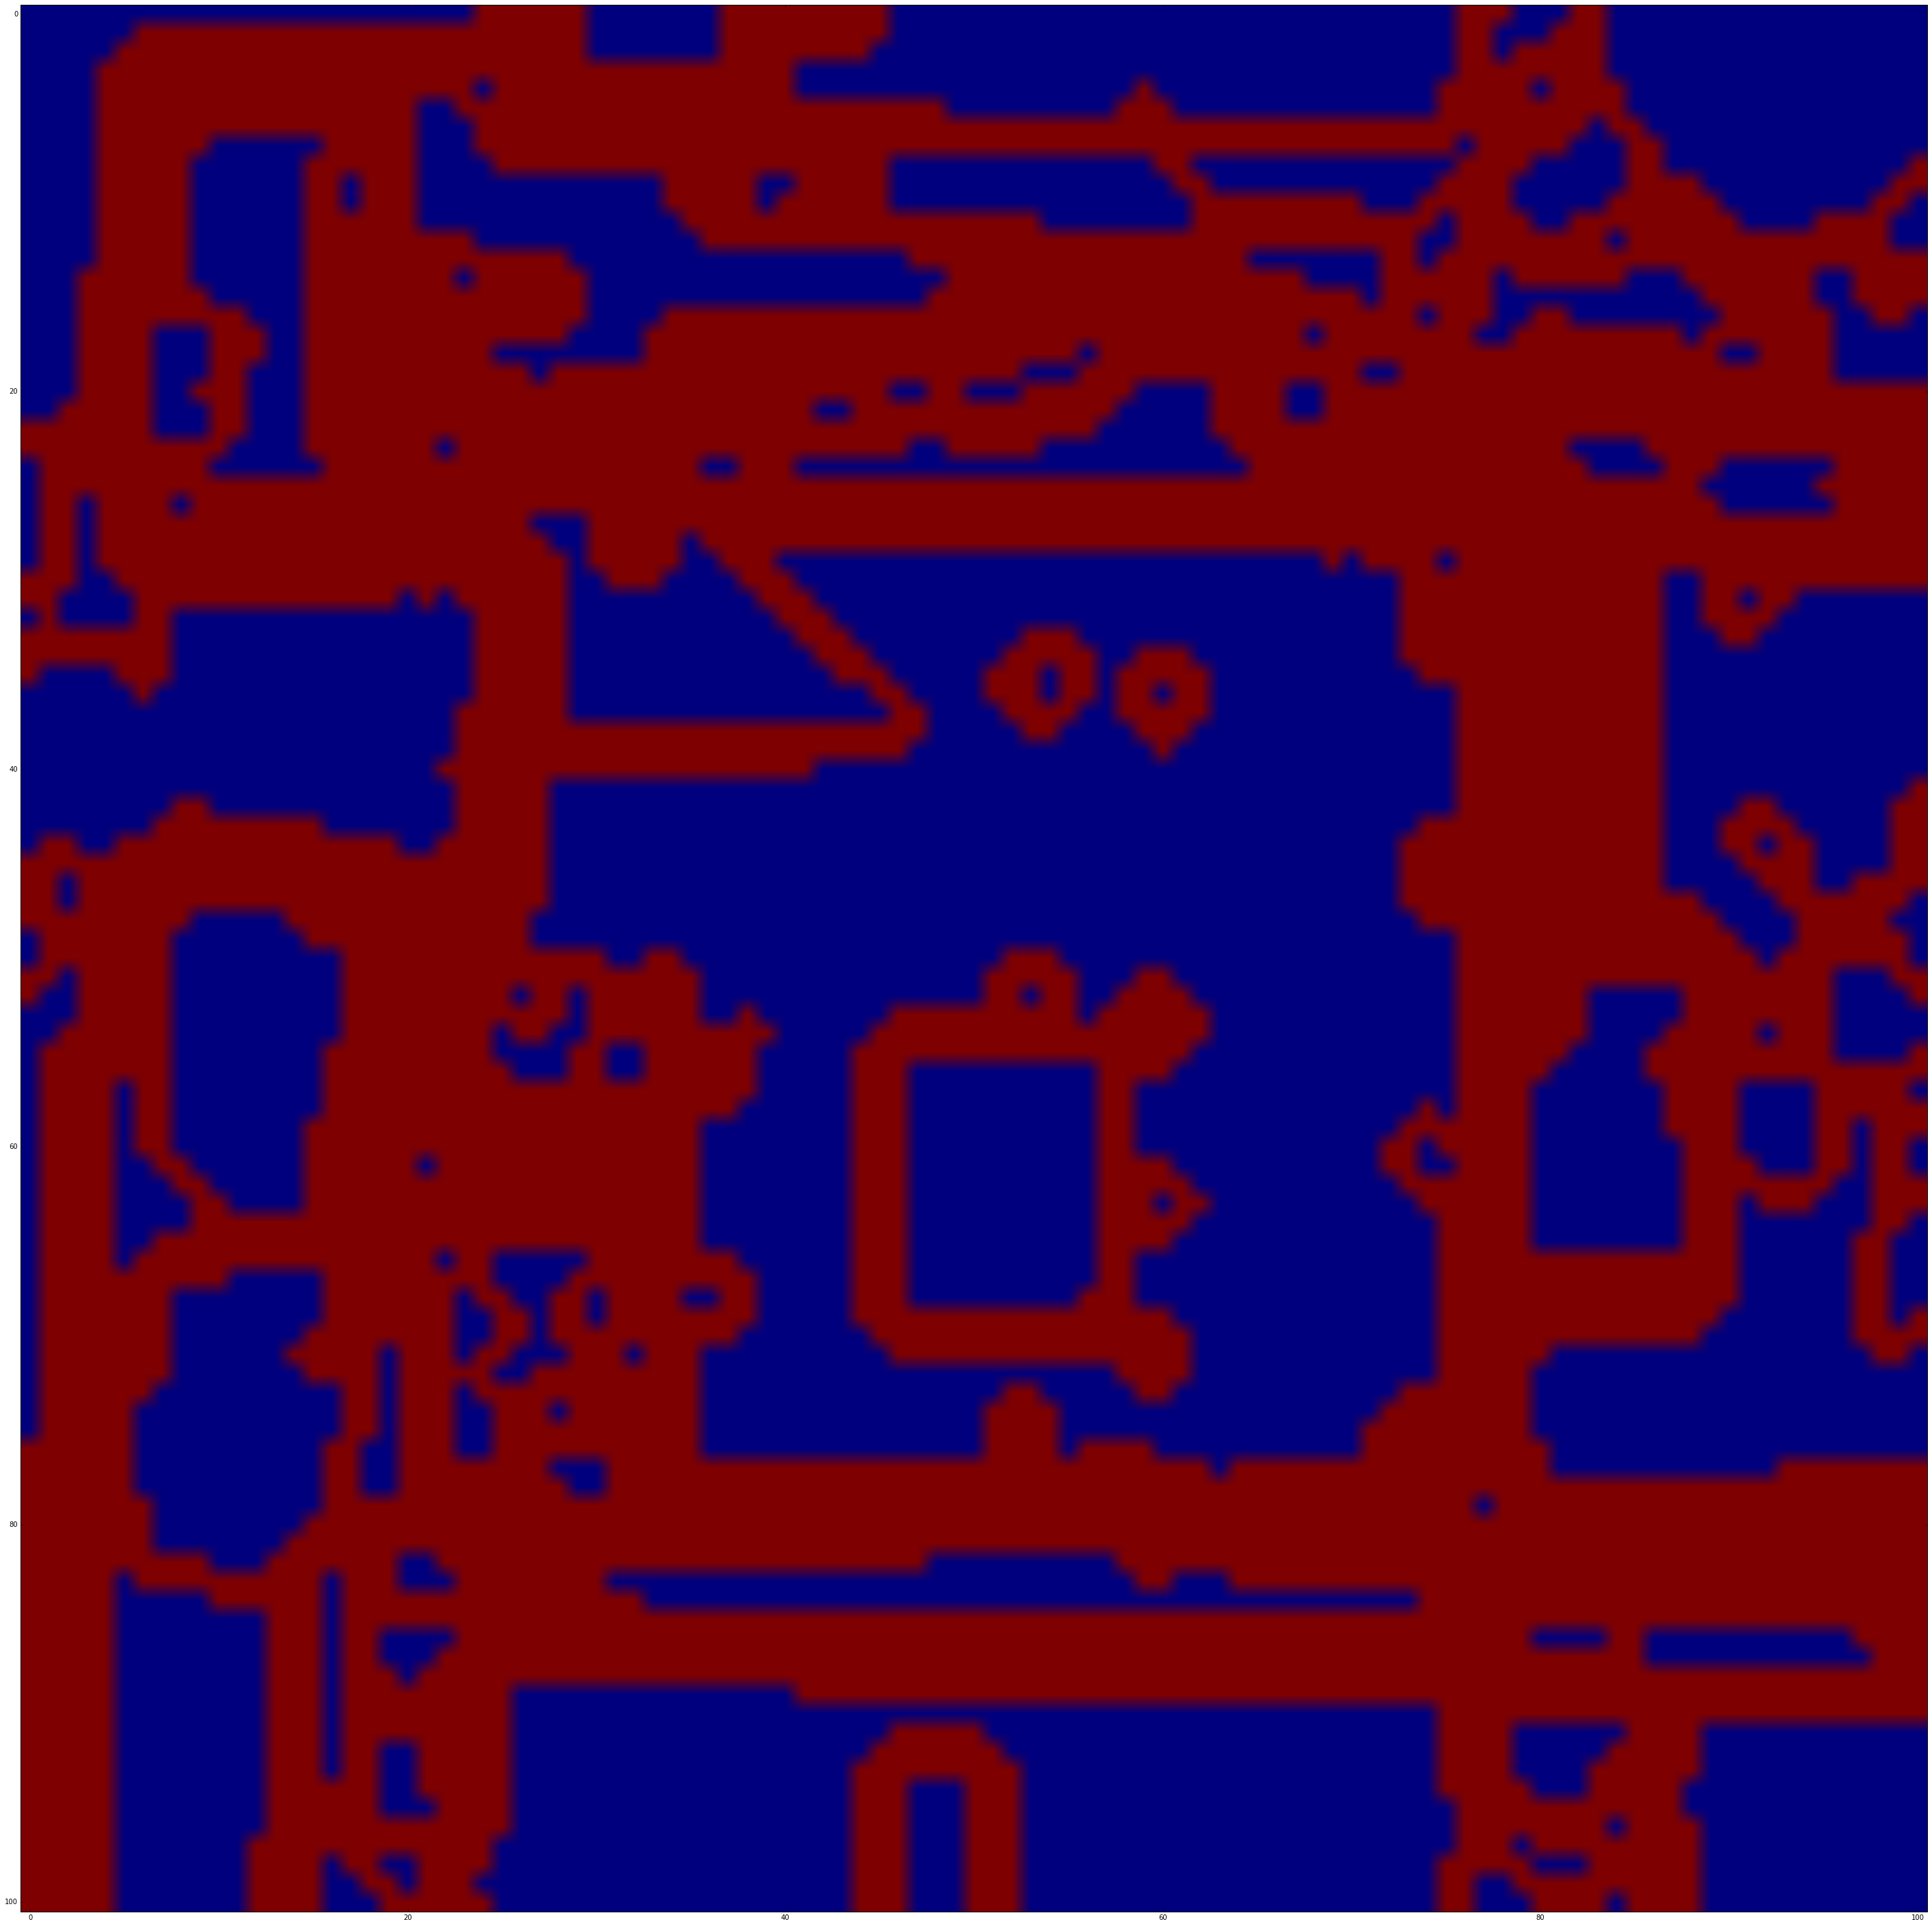

In [18]:
outlines = find_boundaries(felzSegments)
plt.figure(figsize=(50,50))
plt.imshow(outlines)